In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


In [6]:
# Load the first 8 metadata rows
meta = pd.read_csv("ADNI_Gene_Expression_Profile.csv", nrows=8, header=None)

# Transpose
meta = meta.set_index(0).T

meta.columns = ["Phase", "Visit", "SubjectID", "260_280", "260_230", "RIN", "Affy_Plate", "Year_Collected"]

# Drop NaN
meta = meta.dropna(subset=["SubjectID"])


meta = meta.reset_index(drop=True)


print("Metadata shape:", meta.shape)
meta.head()

Metadata shape: (744, 8)


,Phase,Visit,SubjectID,260_280,260_230,RIN,Affy_Plate,Year_Collected
0,ADNIGO,m48,116_S_1249,2.05,0.55,7.7,7,2011
1,ADNI2,v03,037_S_4410,2.07,1.54,7.6,3,2012
2,ADNI2,v03,006_S_4153,2.04,2.1,7.2,6,2011
3,ADNIGO,m48,116_S_1232,2.03,1.52,6.8,7,2011
4,ADNI2,v03,099_S_4205,2.01,1.6,7.9,9,2011


In [7]:
gene_expr = pd.read_csv("ADNI_Gene_Expression_Profile.csv", skiprows=8)
gene_expr_clean = gene_expr.set_index("Symbol").drop(columns=["ProbeSet", "LocusLink"], errors="ignore")

expected_cols = len(meta["SubjectID"].dropna())
if gene_expr_clean.shape[1] > expected_cols:
    gene_expr_clean = gene_expr_clean.iloc[:, :expected_cols]

gene_expr_clean.columns = meta["SubjectID"].dropna().astype(str).values


In [ ]:
gene_expr_clean

,116_S_1249,037_S_4410,006_S_4153,116_S_1232,099_S_4205,007_S_4467,128_S_0205,003_S_2374,036_S_4491,098_S_4059,...,082_S_4339,022_S_2379,014_S_4668,130_S_0289,141_S_4456,009_S_2381,053_S_4557,073_S_4300,041_S_4014,007_S_0101
Symbol,,,,,,,,,,,,,,,,,,,,,
HIST1H3G,2.237,2.294,2.140,2.062,2.040,2.439,1.955,2.372,2.327,2.535,...,2.575,2.340,2.405,2.349,2.212,2.382,2.497,2.309,2.302,2.661
HIST1H3G,2.624,2.416,2.322,2.500,2.395,2.309,2.451,2.403,2.738,2.478,...,2.841,2.530,2.513,2.754,2.559,2.277,2.466,2.607,2.569,2.679
HIST1H3G,1.873,1.884,1.999,1.851,2.080,1.997,1.539,1.926,1.922,2.073,...,2.247,2.057,2.400,2.247,1.939,2.107,2.137,2.075,2.147,2.028
TNFAIP8L1,2.920,2.668,3.634,3.632,3.278,3.578,3.362,3.371,4.124,3.824,...,3.872,3.509,4.134,3.515,3.707,3.819,3.541,3.496,4.037,3.285
OTOP2,2.147,2.156,2.516,2.283,2.251,2.235,1.992,2.407,2.633,2.789,...,2.365,2.180,2.576,2.146,2.228,2.588,2.256,2.098,2.376,2.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,2.050,1.933,1.985,1.916,2.077,1.788,2.063,2.059,1.891,1.968,...,1.792,1.993,2.160,1.909,1.805,2.017,1.885,1.807,2.188,1.962
NaN,2.060,1.717,1.770,1.878,1.838,1.872,1.824,1.916,1.804,2.162,...,1.808,1.628,2.041,1.777,1.839,1.886,1.742,1.781,1.740,1.906
NaN,1.858,2.208,2.184,2.163,2.085,2.266,2.063,2.483,2.580,2.344,...,2.588,2.194,2.381,2.191,2.176,2.371,2.177,2.110,2.501,2.300


In [8]:
# Transpose
expr_T = gene_expr_clean.T.reset_index()
expr_T = expr_T.rename(columns={"index": "SubjectID"})

# Extract RID
expr_T["RID"] = expr_T["SubjectID"].apply(lambda x: int(x.split("_")[-1]))


In [9]:
expr_T = expr_T.loc[:, expr_T.columns.notnull()]
expr_T

Symbol,SubjectID,HIST1H3G,HIST1H3G,HIST1H3G,TNFAIP8L1,OTOP2,C17ORF78,CTAGE6 || CTAGE15,F8A2 || F8A3 || F8A1,LINC01098,...,PRKACB,TRIM44,TRIM44,TRIM44,ARL2BP,DDR1,DDR1,ADM,TCEAL8,RID
0,116_S_1249,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,...,8.615,3.457,5.746,9.012,5.032,6.096,5.306,9.418,6.071,1249
1,037_S_4410,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,...,9.598,3.291,5.718,8.846,5.237,5.647,5.159,8.941,6.369,4410
2,006_S_4153,2.140,2.322,1.999,3.634,2.516,1.957,2.333,4.442,2.544,...,8.035,3.438,5.361,9.074,5.127,5.563,5.406,8.727,6.349,4153
3,116_S_1232,2.062,2.500,1.851,3.632,2.283,2.347,2.258,4.608,2.233,...,6.872,3.545,5.677,8.747,4.484,5.430,5.541,8.955,6.329,1232
4,099_S_4205,2.040,2.395,2.080,3.278,2.251,2.154,2.334,4.536,2.546,...,8.722,3.324,5.685,9.131,4.957,6.057,5.411,9.601,6.573,4205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,009_S_2381,2.382,2.277,2.107,3.819,2.588,2.201,2.531,4.455,2.335,...,8.417,3.553,5.185,8.717,4.368,4.399,5.256,9.418,NaN,2381
740,053_S_4557,2.497,2.466,2.137,3.541,2.256,2.205,2.737,4.725,2.078,...,8.101,3.112,5.083,8.788,4.334,5.768,5.296,9.592,NaN,4557
741,073_S_4300,2.309,2.607,2.075,3.496,2.098,2.161,2.439,4.981,2.394,...,8.054,3.356,6.089,9.039,4.880,5.232,5.148,9.075,NaN,4300
742,041_S_4014,2.302,2.569,2.147,4.037,2.376,2.130,2.585,5.005,2.396,...,8.354,3.500,5.062,8.591,4.784,5.430,5.088,9.124,NaN,4014


In [ ]:
expr_T.describe()

Symbol,HIST1H3G,HIST1H3G,HIST1H3G,TNFAIP8L1,OTOP2,C17ORF78,CTAGE6 || CTAGE15,F8A2 || F8A3 || F8A1,LINC01098,SAMD7,...,GAPDH,STAT1,STAT1,STAT1,STAT1,RNA18S5 || RNA45S5,RNA18S5 || RNA45S5,RNA18S5 || RNA45S5,RNA28S5 || RNA45S5,RID
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,2.419516,2.445267,2.035317,3.565671,2.291422,2.138185,2.471384,4.749767,2.387440,2.802491,...,11.128601,9.619505,9.485284,6.922259,6.290766,7.916185,8.758094,11.838575,5.530401,2741.111559
std,0.197363,0.225416,0.177504,0.306625,0.162164,0.144874,0.195415,0.247423,0.144148,0.195602,...,0.141130,0.418272,0.398924,0.542183,0.555133,0.510219,0.702602,0.204795,0.539555,1691.997650
min,1.955000,1.912000,1.539000,2.540000,1.808000,1.787000,1.994000,4.114000,2.026000,2.254000,...,10.554000,8.367000,8.091000,5.635000,4.457000,5.780000,5.828000,10.757000,3.580000,2.000000
25%,2.296000,2.287750,1.914000,3.354750,2.189750,2.039000,2.331750,4.571000,2.286000,2.675000,...,11.052000,9.331250,9.231250,6.572750,5.923000,7.599250,8.395000,11.751250,5.190500,1014.500000
50%,2.405000,2.423500,2.023500,3.560500,2.285000,2.126000,2.462000,4.737500,2.377000,2.791500,...,11.135000,9.628000,9.470500,6.896500,6.267000,7.934500,8.845500,11.871500,5.508000,3204.000000
75%,2.525250,2.578000,2.136250,3.754500,2.390000,2.217000,2.598250,4.918500,2.473000,2.908250,...,11.213000,9.909250,9.715500,7.225000,6.624500,8.256500,9.223500,11.972000,5.872250,4338.250000
max,3.482000,3.507000,2.867000,4.810000,2.842000,2.809000,3.267000,5.678000,2.941000,4.764000,...,11.586000,10.977000,10.896000,9.137000,8.470000,9.683000,10.816000,12.405000,7.581000,4707.000000


CLINICAL DATA

In [10]:
ptdemog = pd.read_csv("All_Subjects_PTDEMOG_10May2025.csv")
my_table = pd.read_csv("All_Subjects_My_Table_10May2025.csv")
mmse = pd.read_csv("All_Subjects_MMSE_10May2025.csv")
gdscale = pd.read_csv("All_Subjects_GDSCALE_10May2025.csv")
faq = pd.read_csv("All_Subjects_FAQ_10May2025.csv")
dxsum = pd.read_csv("All_Subjects_DXSUM_10May2025.csv")
cdr = pd.read_csv("All_Subjects_CDR_10May2025.csv")
adas = pd.read_csv("All_Subjects_ADAS_ADNIGO23_10May2025.csv")


In [11]:
ptdemog_clean = ptdemog[["RID", "PTGENDER", "PTEDUCAT"]].copy()
mmse_clean = mmse[["RID", "VISCODE", "MMSCORE"]].copy()
gdscale_clean = gdscale[["RID", "VISCODE", "GDTOTAL"]].copy()
faq_clean = faq[["RID", "VISCODE", "FAQTOTAL"]].copy()
cdr_clean = cdr[["RID", "VISCODE", "CDGLOBAL", "CDRSB"]].copy()
adas_clean = adas[["RID", "VISCODE", "TOTAL13"]].copy()


In [12]:
dxsum_clean = dxsum[["RID", "VISCODE", "DIAGNOSIS"]].copy()

def classify(row):
    if row["DIAGNOSIS"] == 1:
        return "CU"
    elif row["DIAGNOSIS"] == 2:
        return "MCI"
    elif row["DIAGNOSIS"] == 3:
        return "AD"
    else:
        return None

dxsum_clean["Diagnosis_Label"] = dxsum_clean.apply(classify, axis=1)
dxsum_clean = dxsum_clean.drop(columns=["DIAGNOSIS"])


In [13]:
merged = dxsum_clean.copy()
merged = merged.merge(mmse_clean, on=["RID", "VISCODE"], how="left")
merged = merged.merge(cdr_clean, on=["RID", "VISCODE"], how="left")
merged = merged.merge(adas_clean, on=["RID", "VISCODE"], how="left")
merged = merged.merge(faq_clean, on=["RID", "VISCODE"], how="left")
merged = merged.merge(gdscale_clean, on=["RID", "VISCODE"], how="left")
merged = merged.merge(ptdemog_clean, on="RID", how="left")



In [ ]:
merged.to_csv("merged_ADNI_dataset.csv", index=False)


In [ ]:
print("Final row count:", merged.shape[0])
print("Missing values (%):")
print(merged.isnull().mean() * 100)


Final row count: 25187
Missing values (%):
RID                 0.000000
VISCODE             0.000000
Diagnosis_Label     0.198515
MMSCORE            17.231111
CDGLOBAL           17.147735
CDRSB              17.898122
TOTAL13            48.636201
FAQTOTAL           14.265296
GDTOTAL            25.644182
PTGENDER            4.474531
PTEDUCAT            4.601580
dtype: float64


In [14]:
#will impute the mean val
imputer = SimpleImputer(strategy='mean')

clinical_cols = ["MMSCORE", "CDGLOBAL", "CDRSB", "TOTAL13", "FAQTOTAL", "GDTOTAL", "PTGENDER", "PTEDUCAT"]
merged[clinical_cols] = imputer.fit_transform(merged[clinical_cols])

In [ ]:
print("Final row count:", merged.shape[0])
print("Missing values (%):")
print(merged.isnull().mean() * 100)

Final row count: 25187
Missing values (%):
RID                0.000000
VISCODE            0.000000
Diagnosis_Label    0.198515
MMSCORE            0.000000
CDGLOBAL           0.000000
CDRSB              0.000000
TOTAL13            0.000000
FAQTOTAL           0.000000
GDTOTAL            0.000000
PTGENDER           0.000000
PTEDUCAT           0.000000
dtype: float64


In [15]:
# dropping duplicates that have same RID and VISCODE
merged = merged.drop_duplicates(subset=["RID", "VISCODE"], keep="first")

In [ ]:
print("Clinical data shape:", merged.shape)
display(merged.head(2))

print("\nGene expression shape:", expr_T.shape)
display(expr_T.head(2))

Clinical data shape: (15119, 11)


,RID,VISCODE,Diagnosis_Label,MMSCORE,CDGLOBAL,CDRSB,TOTAL13,FAQTOTAL,GDTOTAL,PTGENDER,PTEDUCAT
0,2,bl,CU,27.035593,0.387387,1.80751,15.21372,0.0,1.691371,1.0,16.0
3,3,bl,AD,27.035593,0.387387,1.80751,15.21372,10.0,1.691371,1.0,18.0



Gene expression shape: (744, 48159)


Symbol,SubjectID,HIST1H3G,HIST1H3G,HIST1H3G,TNFAIP8L1,OTOP2,C17ORF78,CTAGE6 || CTAGE15,F8A2 || F8A3 || F8A1,LINC01098,...,GAPDH,STAT1,STAT1,STAT1,STAT1,RNA18S5 || RNA45S5,RNA18S5 || RNA45S5,RNA18S5 || RNA45S5,RNA28S5 || RNA45S5,RID
0,116_S_1249,2.237,2.624,1.873,2.920,2.147,2.268,2.432,4.600,2.771,...,11.001,9.751,9.139,6.646,6.047,6.890,7.77,11.449,4.416,1249
1,037_S_4410,2.294,2.416,1.884,2.668,2.156,2.130,2.270,4.547,2.363,...,11.058,10.279,9.516,7.062,6.883,7.337,7.49,11.595,4.746,4410


In [17]:
missing = merged[~merged['RID'].isin(expr_T['RID'])][['RID', 'Diagnosis_Label']]
print(f"Subjects needing augmentation: {len(missing)}")
display(missing)

Subjects needing augmentation: 9138


,RID,Diagnosis_Label
3,3,AD
4,5,CU
8,7,AD
9,15,CU
11,30,MCI
...,...,...
25180,10751,CU
25181,10667,CU
25182,4722,MCI
25184,4723,MCI


In [18]:
# Calculate mean gene expression per diagnosis group
mean_genes = expr_T.merge(merged[['RID', 'Diagnosis_Label']], on='RID') \
                   .groupby('Diagnosis_Label').mean(numeric_only=True)

# Assign mean genes to missing subjects
augmented_data = []
for dx in ['CU', 'MCI', 'AD']:
    dx_rids = missing[missing['Diagnosis_Label'] == dx]['RID']
    if not dx_rids.empty:
        # Create one row per RID with the group's mean genes
        dx_genes = pd.DataFrame(
            np.tile(mean_genes.loc[dx].values, (len(dx_rids), 1)),  # Repeat mean genes for each RID
            columns=mean_genes.columns
        )
        dx_genes['RID'] = dx_rids.values  # Now lengths match
        augmented_data.append(dx_genes)

augmented_genes = pd.concat(augmented_data, ignore_index=True)
print("Augmented data shape:", augmented_genes.shape)

Augmented data shape: (9108, 1613)


In [ ]:
print("Duplicate columns in expr_T:", expr_T.columns[expr_T.columns.duplicated()].tolist())
print("Duplicate columns in augmented_genes:", augmented_genes.columns[augmented_genes.columns.duplicated()].tolist())

Duplicate columns in expr_T: ['HIST1H3G', 'HIST1H3G', 'FAM86C1', 'CGB || CGB1 || CGB2 || CGB5 || CGB7 || CGB8', 'SSX7', 'HIST2H2AB', 'PCDHGB1', 'DNAJC12', 'DEPDC5', 'TDRKH', 'FAM86C1', 'PRB1', 'PRB1', 'FAM221A', 'FAM221A', 'LOC100288289 || LOC100288325 || LOC100288355 || LOC100288398 || LOC100288433 || LOC100288466 || LOC100288494 || LOC100288523 || LOC100288557 || LOC100288593 || LOC100288627 || LOC100288657 || DUX4L* || LOC100653046 || DUX4 || DUX2 || DUX4L4 || DUX4L7 || DUX4L6 || DUX4L5 || DUX4L3 || DUX4L2', 'LOC100288289 || LOC100288325 || LOC100288355 || LOC100288398 || LOC100288433 || LOC100288466 || LOC100288494 || LOC100288523 || LOC100288557 || LOC100288593 || LOC100288627 || LOC100288657 || DUX4L* || LOC100653046 || DUX4 || DUX2 || DUX4L4 || DUX4L7 || DUX4L6 || DUX4L5 || DUX4L3 || DUX4L2', 'LOC100288289 || LOC100288325 || LOC100288355 || LOC100288398 || LOC100288433 || LOC100288466 || LOC100288494 || LOC100288523 || LOC100288557 || LOC100288593 || LOC100288627 || LOC100288657

In [19]:
# Remove duplicate columns while keeping first occurrence
expr_T = expr_T.loc[:, ~expr_T.columns.duplicated()]
augmented_genes = augmented_genes.loc[:, ~augmented_genes.columns.duplicated()]

# Verify uniquness
print("expr_T:", expr_T.columns.is_unique)
print("augmented_genes:", augmented_genes.columns.is_unique)

expr_T: True
augmented_genes: True


In [20]:
all_genes = pd.concat([expr_T, augmented_genes], ignore_index=True)

# Merge with clinical data
final_df = pd.merge(
    merged,
    all_genes,
    on='RID',
    how='left'
)

print("Final merged shape:", final_df.shape)

Final merged shape: (50293, 1032)


In [21]:
final_df.to_csv("final_merged_ADNI_dataset.csv", index=False)

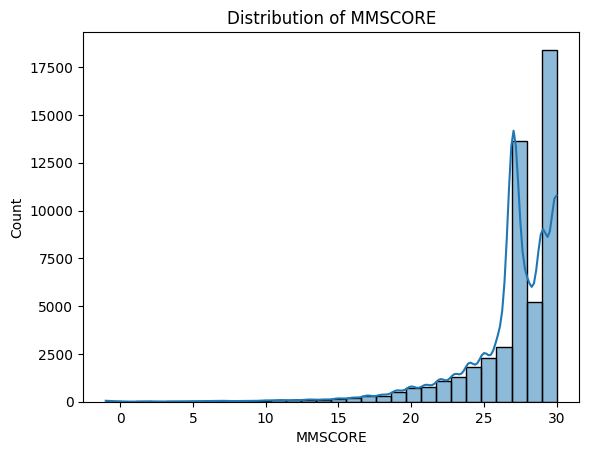

In [22]:
# Histogram for MMSCORE
sns.histplot(data=final_df, x='MMSCORE', bins=30, kde=True)
plt.title('Distribution of MMSCORE')
plt.show()



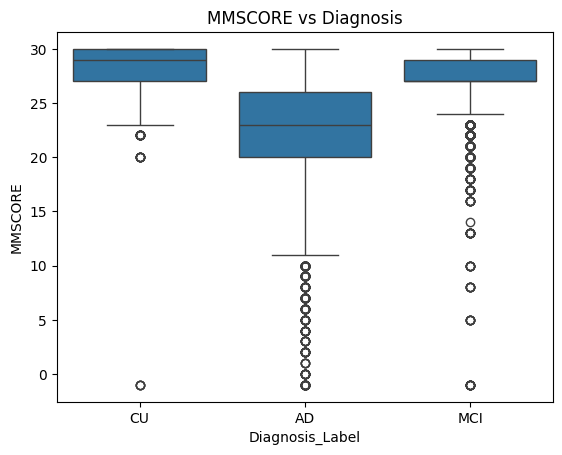

In [23]:
# Boxplot of MMSCORE vs Diagnosis
sns.boxplot(data=final_df, x='Diagnosis_Label', y='MMSCORE')
plt.title('MMSCORE vs Diagnosis')
plt.show()


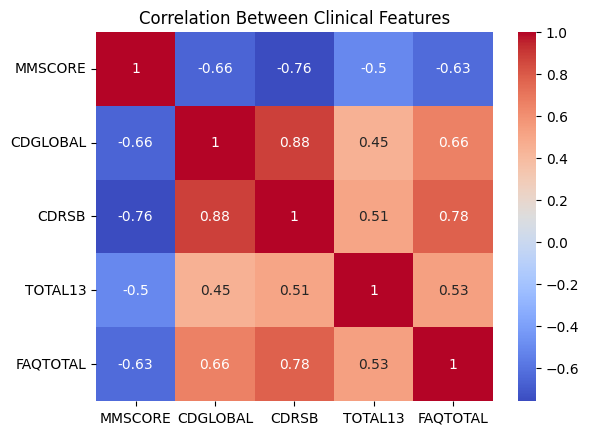

In [24]:
# Correlation heatmap
clinical_subset = final_df[['MMSCORE', 'CDGLOBAL', 'CDRSB', 'TOTAL13', 'FAQTOTAL']]
corr = clinical_subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Clinical Features')
plt.show()

<ipython-input-25-a0fffc179df3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='Diagnosis_Label', palette='Set2')


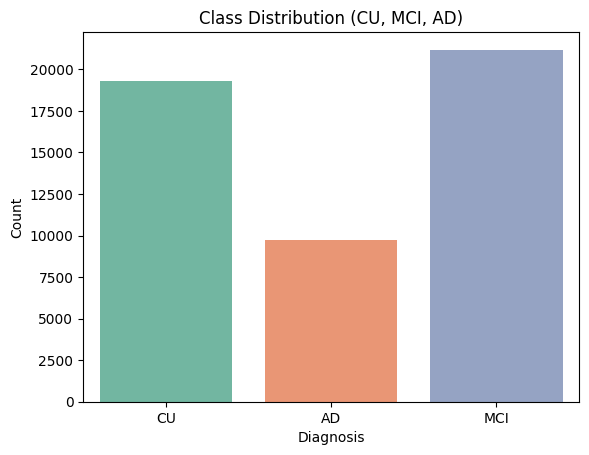

In [25]:
sns.countplot(data=final_df, x='Diagnosis_Label', palette='Set2')
plt.title('Class Distribution (CU, MCI, AD)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

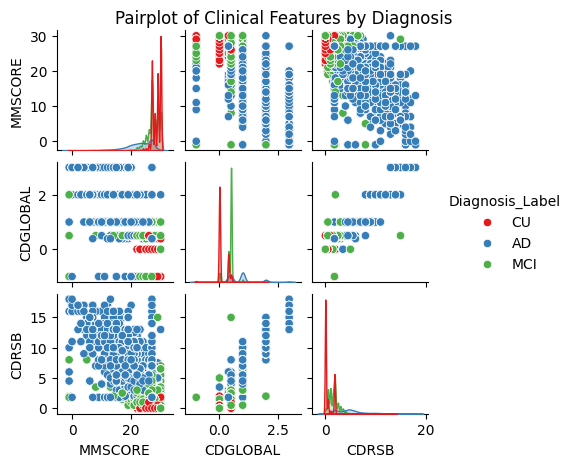

In [26]:
sns.pairplot(final_df[['MMSCORE', 'CDGLOBAL', 'CDRSB', 'Diagnosis_Label']], hue='Diagnosis_Label', palette='Set1', height=1.5)
plt.suptitle('Pairplot of Clinical Features by Diagnosis', y=1.02)
plt.show()

In [ ]:
final_df

In [27]:
final_df = final_df.drop_duplicates(subset=["RID", "VISCODE"], keep="first")

In [29]:
final_df.to_csv("final_merged_ADNI_dataset.csv", index=False)

IMPLEMENTATION

In [30]:
df = final_df.copy()

In [31]:
df = df.dropna(subset=["Diagnosis_Label"]).reset_index(drop=True)

In [32]:
le_diag = LabelEncoder()
df["Diagnosis_Label_Encoded"] = le_diag.fit_transform(df["Diagnosis_Label"])

le_vis = LabelEncoder()
df["VISCODE_Encoded"] = le_vis.fit_transform(df["VISCODE"])


In [33]:
non_gene_cols = [
    "RID", "SubjectID", "Diagnosis_Label", "Diagnosis_Label_Encoded",
    "VISCODE", "VISCODE_Encoded", "MMSCORE", "CDGLOBAL", "CDRSB",
    "TOTAL13", "FAQTOTAL", "GDTOTAL", "PTGENDER", "PTEDUCAT"
]

gene_cols = [col for col in df.columns if col not in non_gene_cols]
clinical_cols = ["MMSCORE", "CDGLOBAL", "CDRSB", "TOTAL13", "FAQTOTAL", "GDTOTAL", "PTGENDER", "PTEDUCAT", "VISCODE_Encoded"]


In [34]:
imputer = SimpleImputer(strategy="mean")
genes_imputed = pd.DataFrame(imputer.fit_transform(df[gene_cols]), columns=gene_cols)
clinical_imputed = pd.DataFrame(imputer.fit_transform(df[clinical_cols]), columns=clinical_cols)


In [35]:
scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes_imputed)

pca = PCA(n_components=50, random_state=42)
genes_pca = pca.fit_transform(genes_scaled)

genes_pca_df = pd.DataFrame(genes_pca, columns=[f"PC{i+1}" for i in range(50)])


In [36]:
X_final = pd.concat([genes_pca_df, clinical_imputed], axis=1)
y_final = df["Diagnosis_Label_Encoded"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, stratify=y_final, random_state=42
)


LOGISTIC REGRESSION

In [38]:
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(" Logistic Regression Report")
print(classification_report(y_test, y_pred_lr, target_names=le_diag.classes_))


 Logistic Regression Report
              precision    recall  f1-score   support

          AD       0.88      0.81      0.84       581
          CU       0.88      0.91      0.89      1179
         MCI       0.83      0.83      0.83      1257

    accuracy                           0.86      3017
   macro avg       0.86      0.85      0.86      3017
weighted avg       0.86      0.86      0.86      3017



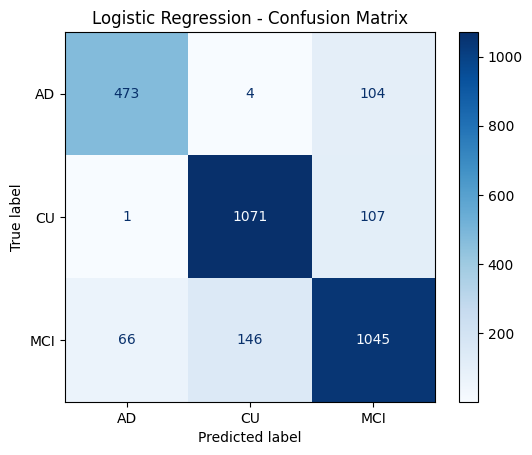

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    display_labels=le_diag.classes_,
    cmap="Blues"
)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

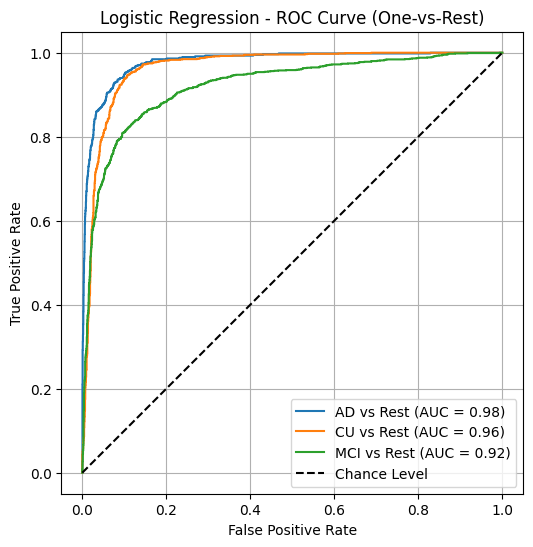

In [41]:
# Binarize y_test for plotting
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate predicted probabilities
y_probs_lr = lr_model.predict_proba(X_test)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
for i, class_name in enumerate(le_diag.classes_):
    if class_name is not None and i < y_test_bin.shape[1]:
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i],
            y_probs_lr[:, i],
            name=f'{class_name} vs Rest',
            ax=ax,

        )

plt.title('Logistic Regression - ROC Curve (One-vs-Rest)')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

RANDOM FOREST

In [42]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf, target_names=le_diag.classes_))


Random Forest Report
              precision    recall  f1-score   support

          AD       0.94      0.91      0.92       581
          CU       0.94      0.95      0.95      1179
         MCI       0.91      0.92      0.92      1257

    accuracy                           0.93      3017
   macro avg       0.93      0.93      0.93      3017
weighted avg       0.93      0.93      0.93      3017



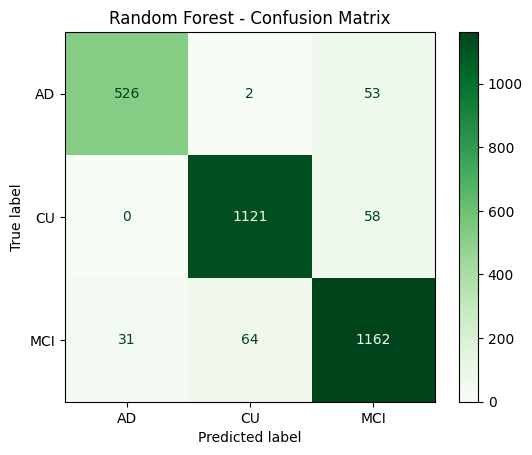

In [43]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=le_diag.classes_,
    cmap="Greens"
)
plt.title("Random Forest - Confusion Matrix")
plt.show()


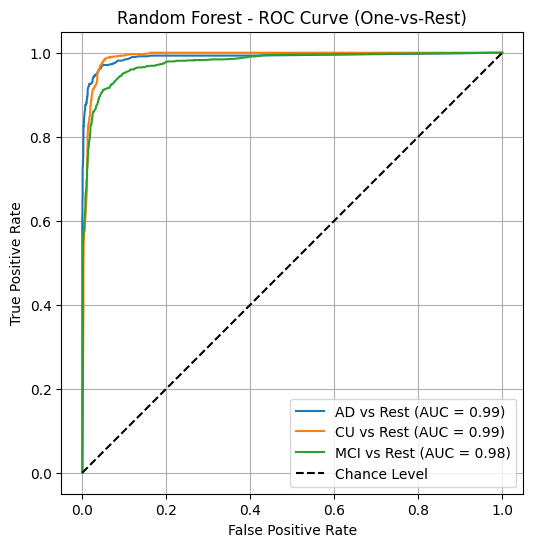

In [44]:
y_probs_rf = rf_model.predict_proba(X_test)

# Binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curve for Random Forest
fig, ax = plt.subplots(figsize=(8, 6))
for i, class_name in enumerate(le_diag.classes_):
    if class_name is not None and i < y_test_bin.shape[1]:
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i],
            y_probs_rf[:, i],
            name=f'{class_name} vs Rest',
            ax=ax,
        )

plt.title('Random Forest - ROC Curve (One-vs-Rest)')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


XGBOOST

In [45]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=le_diag.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:01:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report
              precision    recall  f1-score   support

          AD       0.93      0.90      0.92       581
          CU       0.94      0.97      0.96      1179
         MCI       0.93      0.92      0.92      1257

    accuracy                           0.93      3017
   macro avg       0.93      0.93      0.93      3017
weighted avg       0.93      0.93      0.93      3017



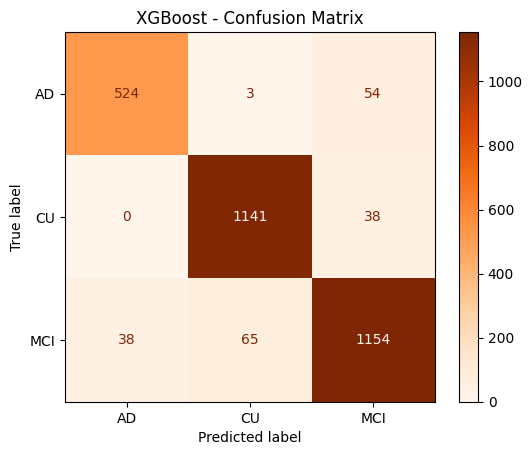

In [46]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb,
    display_labels=le_diag.classes_,
    cmap="Oranges"
)
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [47]:
y_probs_xgb = xgb_model.predict_proba(X_test)
xgb_auc = roc_auc_score(y_test_bin, y_probs_xgb, multi_class='ovr', average='macro')
print("XGBoost ROC AUC (macro):", round(xgb_auc, 4))

XGBoost ROC AUC (macro): 0.9885


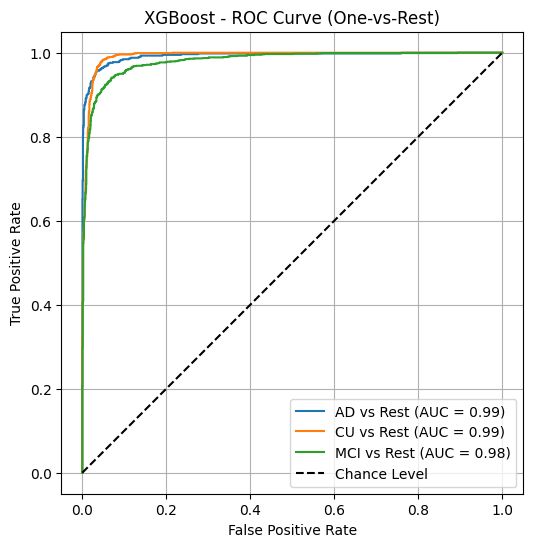

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
for i, class_name in enumerate(le_diag.classes_):
    if class_name is not None and i < y_test_bin.shape[1]: # Exclude None class and check if class index is valid
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i],  # Use binarized y_test for the current class
            y_probs_xgb[:, i],
            name=f'{class_name} vs Rest',
            ax=ax,
        )

plt.title('XGBoost - ROC Curve (One-vs-Rest)')
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: so look i want to see the whole dataset that i am working with rn with pca, imputs, encodes and everything

# Display the first few rows of the final prepared dataset
print("Preview of the final dataset after all processing steps:")
display(X_final.head())

# Display the shape of the final dataset
print("\nShape of the final dataset (features):", X_final.shape)
print("Shape of the final dataset (target):", y_final.shape)

# Display information about the final dataset (data types, non-null counts)
print("\nInformation about the final dataset:")
X_final.info()

# Display basic descriptive statistics of the final dataset
print("\nDescriptive statistics of the final dataset:")
display(X_final.describe())

KNN

In [49]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

In [50]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [51]:
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

# Predict on test
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)

In [52]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


KNN - Confusion Matrix 


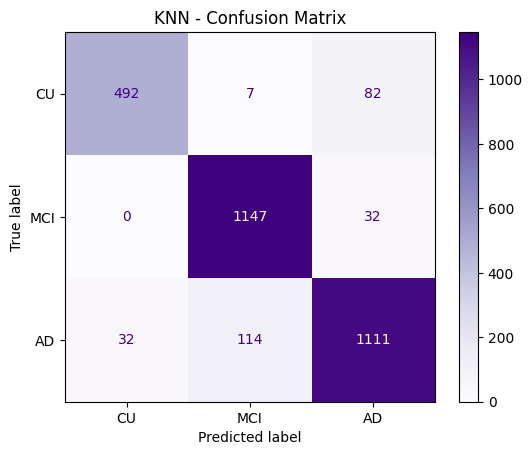

In [53]:
# Confusion Matrix
print("KNN - Confusion Matrix ")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="Purples"
)
plt.title("KNN - Confusion Matrix")
plt.show()

 KNN - ROC Curve 


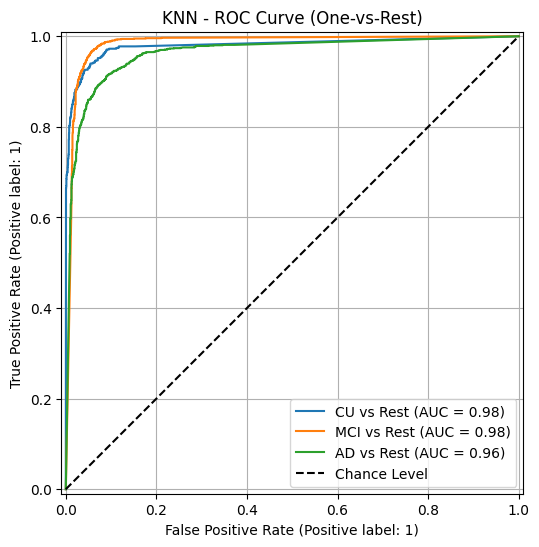

In [54]:
# ROC Curve (One-vs-Rest for multi-class)
print(" KNN - ROC Curve ")
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('KNN - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

SVM

In [77]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear']
}

In [78]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [79]:
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

# Predict on test
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)

In [80]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'kernel': 'linear'}


In [81]:
# Classification Report
print("SVM - Classification Report")
print(classification_report(y_test, y_pred, target_names=['CU', 'MCI', 'AD']))


SVM - Classification Report
              precision    recall  f1-score   support

          CU       0.87      0.83      0.85       581
         MCI       0.88      0.91      0.90      1179
          AD       0.84      0.83      0.84      1257

    accuracy                           0.86      3017
   macro avg       0.86      0.86      0.86      3017
weighted avg       0.86      0.86      0.86      3017



SVM - Confusion Matrix


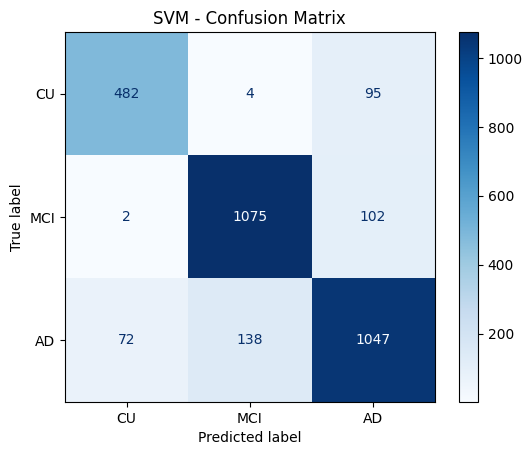

In [83]:
# Confusion Matrix
print("SVM - Confusion Matrix" )
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="Blues"
)
plt.title("SVM - Confusion Matrix")
plt.show()

 SVM - ROC Curve 


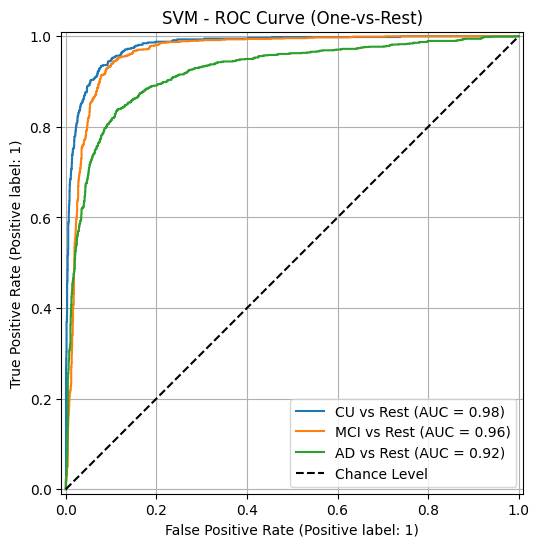

In [84]:
# ROC Curve (One-vs-Rest for multi-class)
print(" SVM - ROC Curve ")
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('SVM - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

DECISION TREE

In [56]:
#Train
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)

In [57]:
print("Decision Tree - Classification Report ")
print(classification_report(y_test, y_pred_dt, target_names=['CU', 'MCI', 'AD']))

Decision Tree - Classification Report 
              precision    recall  f1-score   support

          CU       0.93      0.87      0.90       581
         MCI       0.91      0.93      0.92      1179
          AD       0.88      0.89      0.88      1257

    accuracy                           0.90      3017
   macro avg       0.90      0.89      0.90      3017
weighted avg       0.90      0.90      0.90      3017




=== Decision Tree - Confusion Matrix ===


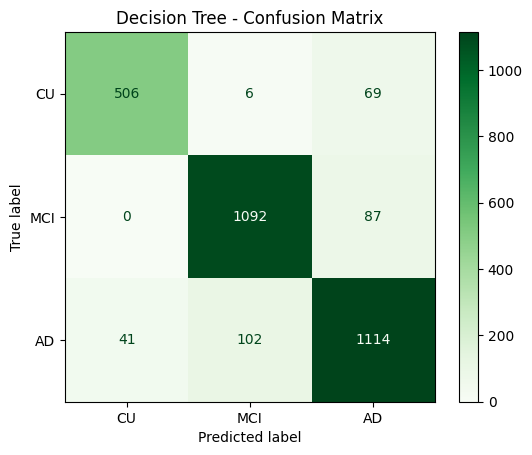

In [58]:
# Confusion Matrix
print("\n=== Decision Tree - Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dt,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="Greens"
)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

Decision Tree - ROC Curve


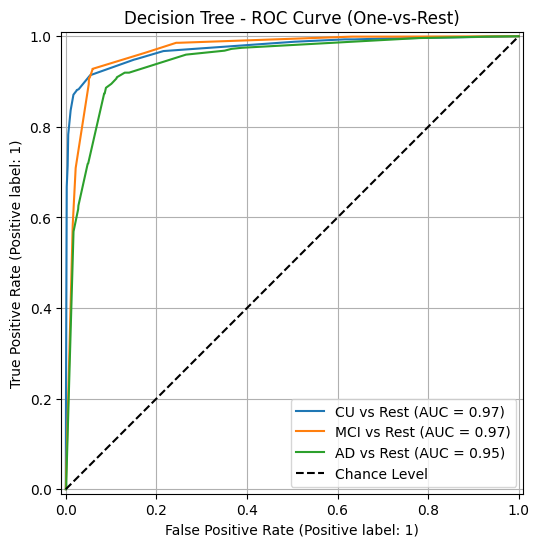

In [59]:
# ROC Curve (One-vs-Rest for multi-class)
print("Decision Tree - ROC Curve")
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba_dt[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('Decision Tree - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

NAIVE BAYES

In [61]:
# Train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)

In [62]:
# Classification Report
print("Naive Bayes - Classification Report")
print(classification_report(y_test, y_pred_nb, target_names=['CU', 'MCI', 'AD']))

Naive Bayes - Classification Report
              precision    recall  f1-score   support

          CU       0.41      0.85      0.55       581
         MCI       0.87      0.74      0.80      1179
          AD       0.64      0.41      0.50      1257

    accuracy                           0.62      3017
   macro avg       0.64      0.67      0.62      3017
weighted avg       0.68      0.62      0.63      3017




=== Naive Bayes - Confusion Matrix ===


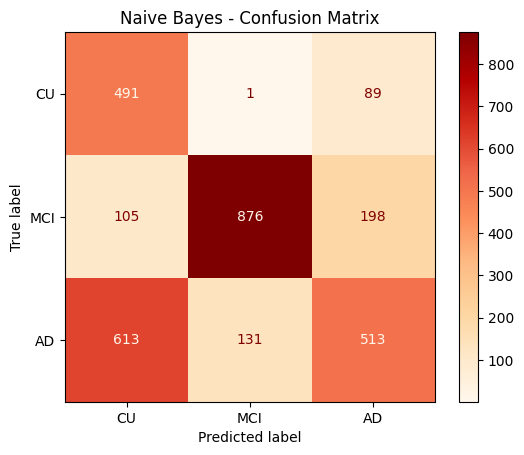

In [63]:
# Confusion Matrix
print("\n=== Naive Bayes - Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_nb,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="OrRd"
)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

Naive Bayes - ROC Curve


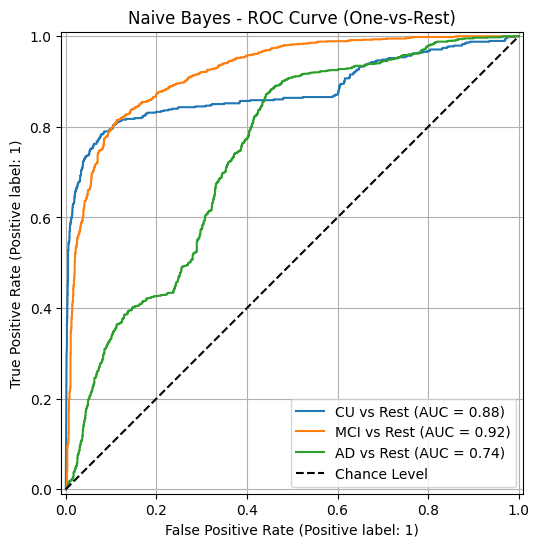

In [64]:
# ROC Curve
print("Naive Bayes - ROC Curve")
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba_nb[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('Naive Bayes - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

Voting Classifier(LOGISTIC REGRESSION, RANDOM FOREST, XGBOOST)

In [66]:
# Define Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

In [67]:
# Train
voting_clf.fit(X_train, y_train)

# Predict
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [68]:
# Classification Report
print("=== Voting Classifier - Classification Report ===")
print(classification_report(y_test, y_pred_voting, target_names=['CU', 'MCI', 'AD']))

=== Voting Classifier - Classification Report ===
              precision    recall  f1-score   support

          CU       0.93      0.91      0.92       581
         MCI       0.94      0.96      0.95      1179
          AD       0.92      0.92      0.92      1257

    accuracy                           0.93      3017
   macro avg       0.93      0.93      0.93      3017
weighted avg       0.93      0.93      0.93      3017




=== Voting Classifier - Confusion Matrix ===


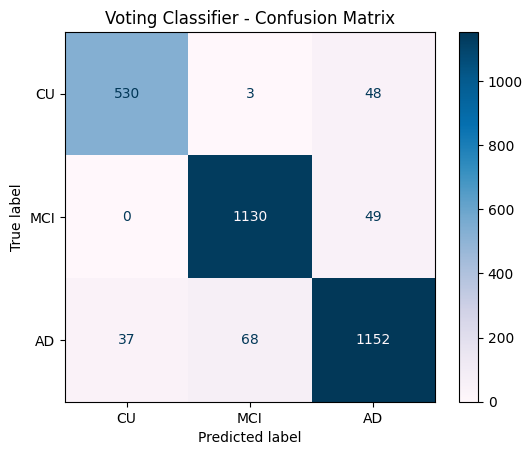

In [69]:
# Confusion Matrix
print("\n=== Voting Classifier - Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_voting,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="PuBu"
)
plt.title("Voting Classifier - Confusion Matrix")
plt.show()


=== Voting Classifier - ROC Curve ===


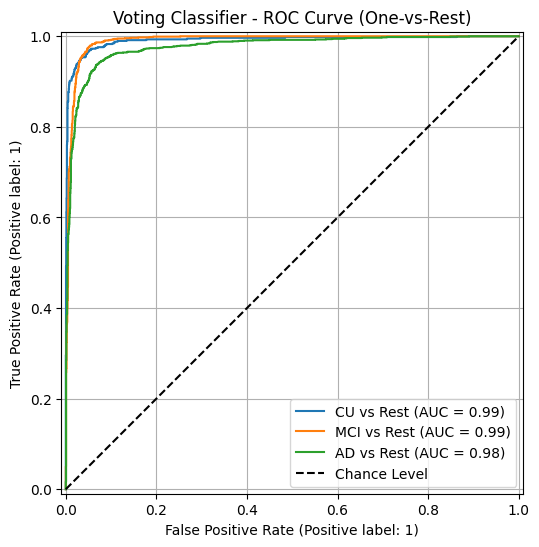

In [70]:
# ROC Curve
print("\n=== Voting Classifier - ROC Curve ===")
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba_voting[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('Voting Classifier - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

STACKING CLASSIFIER

In [72]:
# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

In [73]:
# Train
stacking_clf.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [74]:
# Classification Report
print("=== Stacking Classifier - Classification Report ===")
print(classification_report(y_test, y_pred_stack, target_names=['CU', 'MCI', 'AD']))

=== Stacking Classifier - Classification Report ===
              precision    recall  f1-score   support

          CU       0.94      0.91      0.92       581
         MCI       0.94      0.96      0.95      1179
          AD       0.93      0.92      0.92      1257

    accuracy                           0.93      3017
   macro avg       0.94      0.93      0.93      3017
weighted avg       0.93      0.93      0.93      3017




=== Stacking Classifier - Confusion Matrix ===


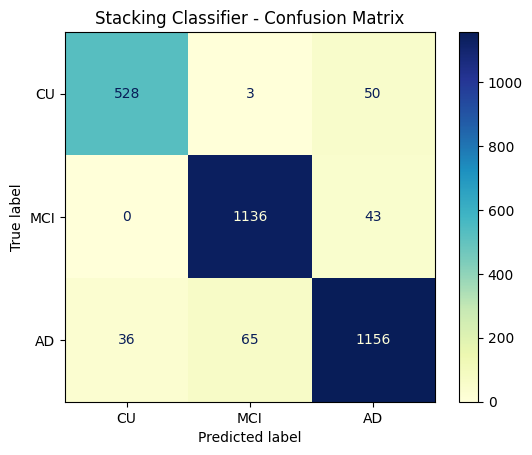

In [75]:
# Confusion Matrix
print("\n=== Stacking Classifier - Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_stack,
    display_labels=['CU', 'MCI', 'AD'],
    cmap="YlGnBu"
)
plt.title("Stacking Classifier - Confusion Matrix")
plt.show()


=== Stacking Classifier - ROC Curve ===


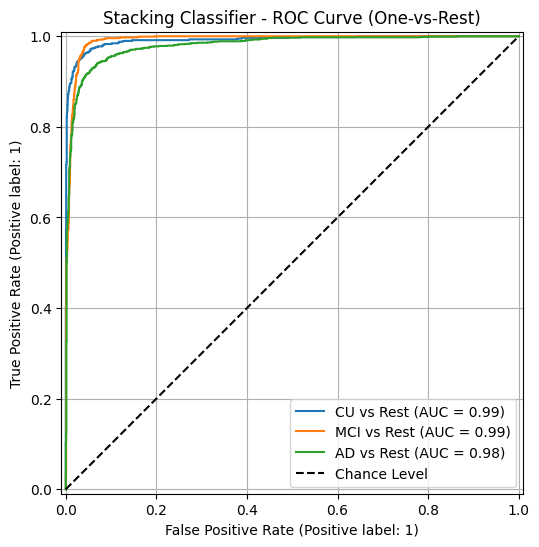

In [76]:
# ROC Curve
print("\n=== Stacking Classifier - ROC Curve ===")
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_proba_stack[:, i],
        name=f'{["CU", "MCI", "AD"][i]} vs Rest',
        ax=ax
    )
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.title('Stacking Classifier - ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
# --- Cell: Collect All Model Results ---
import pandas as pd

# Replace these values with your actual results from each model
model_results = [
    {
        'Model': 'Logistic Regression',
        'Accuracy': 0.86,
        'Precision': 0.86,
        'Recall': 0.86,
        'F1-Score': 0.86,
        'ROC-AUC': 0.95
    },
    {
        'Model': 'Random Forest',
        'Accuracy': 0.93,
        'Precision': 0.93,
        'Recall': 0.93,
        'F1-Score': 0.93,
        'ROC-AUC': 0.95
    },
    {
        'Model': 'XGBoost',
        'Accuracy': 0.93,
        'Precision': 0.93,
        'Recall': 0.93,
        'F1-Score': 0.93,
        'ROC-AUC': 0.986
    },
    {
        'Model': 'SVM',
        'Accuracy': 0.86,
        'Precision': 0.86,
        'Recall': 0.86,
        'F1-Score': 0.86,
        'ROC-AUC': 0.95
    },
    {
        'Model': 'Decision Tree',
        'Accuracy': 0.90,
        'Precision': 0.90,
        'Recall': 0.89,
        'F1-Score': 0.90,
        'ROC-AUC': 0.96
    },
    {
        'Model': 'Naive Bayes',
        'Accuracy': 0.62,
        'Precision': 0.64,
        'Recall': 0.67,
        'F1-Score': 0.62,
        'ROC-AUC': 0.88
    },
    {
        'Model': 'Voting Classifier',
        'Accuracy': 0.93,
        'Precision': 0.93,
        'Recall': 0.93,
        'F1-Score': 0.93,
        'ROC-AUC': 0.986
    },
    {
        'Model': 'Stacking Classifier',
        'Accuracy': 0.93,
        'Precision': 0.94,
        'Recall': 0.93,
        'F1-Score': 0.93,
        'ROC-AUC': 0.986
    }
]

# Create DataFrame
results_df = pd.DataFrame(model_results)
print("Model Performance Comparison:")
print(results_df.to_string(index=False))

Model Performance Comparison:
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression      0.86       0.86    0.86      0.86    0.950
      Random Forest      0.93       0.93    0.93      0.93    0.950
            XGBoost      0.93       0.93    0.93      0.93    0.986
                SVM      0.86       0.86    0.86      0.86    0.950
      Decision Tree      0.90       0.90    0.89      0.90    0.960
        Naive Bayes      0.62       0.64    0.67      0.62    0.880
  Voting Classifier      0.93       0.93    0.93      0.93    0.986
Stacking Classifier      0.93       0.94    0.93      0.93    0.986


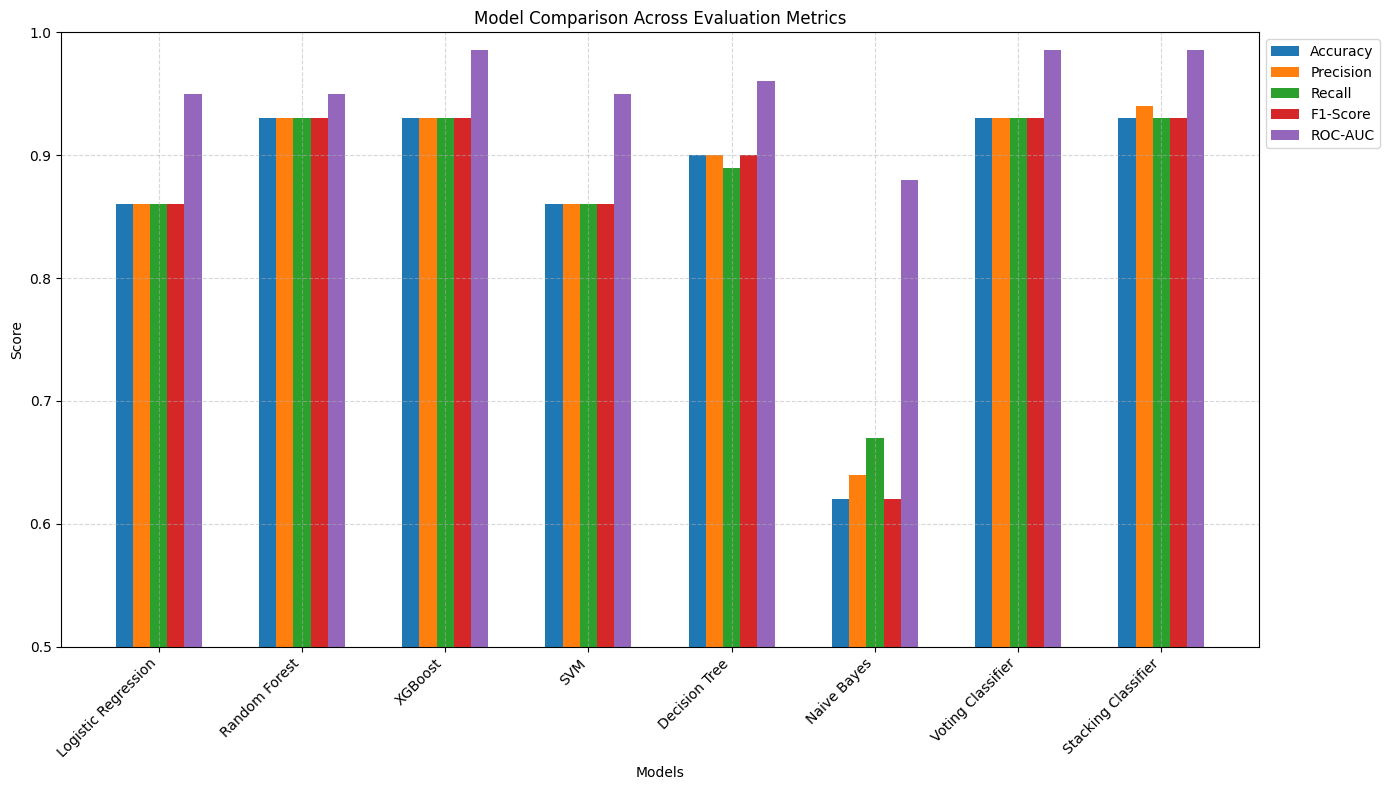

In [3]:
# --- Cell: Clustered Bar Chart Comparing All Models Across All Metrics ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your manually collected data
data = {
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'SVM',
        'Decision Tree',
        'Naive Bayes',
        'Voting Classifier',
        'Stacking Classifier'
    ],
    'Accuracy': [0.86, 0.93, 0.93, 0.86, 0.90, 0.62, 0.93, 0.93],
    'Precision': [0.86, 0.93, 0.93, 0.86, 0.90, 0.64, 0.93, 0.94],
    'Recall': [0.86, 0.93, 0.93, 0.86, 0.89, 0.67, 0.93, 0.93],
    'F1-Score': [0.86, 0.93, 0.93, 0.86, 0.90, 0.62, 0.93, 0.93],
    'ROC-AUC': [0.950, 0.950, 0.986, 0.950, 0.960, 0.880, 0.986, 0.986]
}

results_df = pd.DataFrame(data).set_index('Model')

# Plotting
metrics = results_df.columns
models = results_df.index

bar_width = 0.12
index = np.arange(len(models))

plt.figure(figsize=(14, 8))

# Create a group of bars for each metric
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric], width=bar_width, label=metric)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison Across Evaluation Metrics')
plt.xticks(index + bar_width * 2, models, rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()